# CE - 652
## Artificial Intelligence for Autonomous Driving
## Application Assigments 
##### Week: 4
##### Instructor: Dr. Juan D. Gomez
Related Videos: [Classifiers (SVM, Random Forest)](www.youtube.com) 


In [2]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# 1.  SUPPORT VECTOR MACHINE (SVM):

First, create your own random data (two classes: 0/1) making sure there is widely enough margin between the them (see plot below).

In [200]:
#here your code

Notice that the margin is wide (i.e. the space between blue and red data):

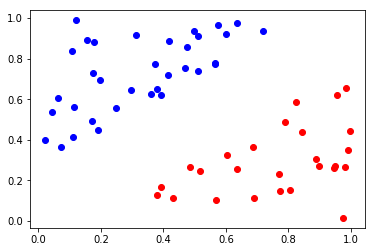

In [201]:
plt.plot(class0x,class0y,'ro')
plt.plot(class1x,class1y,'bo')
plt.show()

Now, create and train a linear SVM (X is the data and y is a binary vector (1/0) of the same size as X representing the class of each data in X):

In [202]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

Let's visualize the support vectors (green) for both clasess:

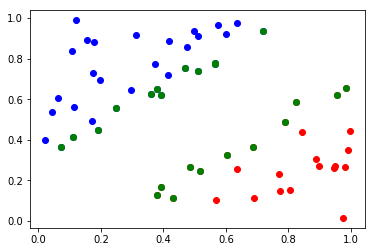

In [203]:
plt.plot(class0x,class0y,'ro')
plt.plot(class1x,class1y,'bo')
plt.plot(clf.support_vectors_[:,0],clf.support_vectors_[:,1],'go')
plt.show()


Now, let's predict the class of the same training data using our trained SVM:

In [204]:
pred=clf.predict(X)

Now, label the data X according to the prediction for plotting purposes:

In [205]:
Pred0x=list()
Pred0y=list()
Pred1x=list()
Pred1y=list()

for i in range(len(pred)):
    if pred[i]==0:
        Pred0x+=[X[i,0]]
        Pred0y+=[X[i,1]]
    else:
        Pred1x+=[X[i,0]]
        Pred1y+=[X[i,1]]

Plot the data again but now classified according to the SVM prediction (labels). Notice that the prediction was flawless:

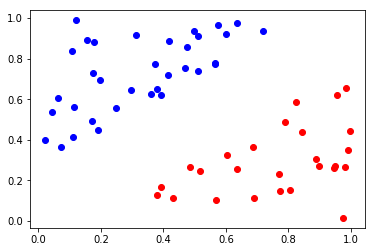

In [206]:
plt.plot(Pred0x,Pred0y,'bo')
plt.plot(Pred1x,Pred1y,'ro')
plt.show()

Here, let's misclassify any point in X:

In [207]:
#here your code   

Notice the misclassification (the blue point inside the red points, i.e, an outlier):

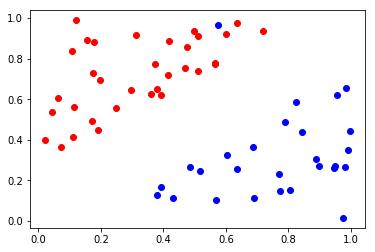

In [208]:
plt.plot(class0x,class0y,'bo')
plt.plot(class1x,class1y,'ro')
plt.show()

Now, let's run the same code as above to see that this is a soft-margin SVM, because despite of the mistake that we induced in the data, the SVM classifies it correctly:

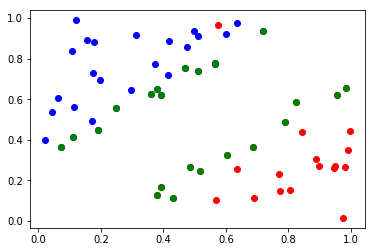

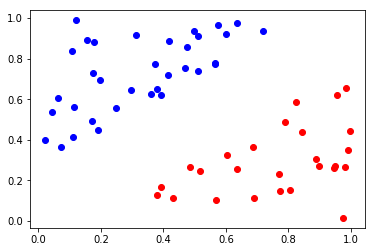

In [209]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.plot(class0x,class0y,'ro')
plt.plot(class1x,class1y,'bo')
plt.plot(clf.support_vectors_[:,0],clf.support_vectors_[:,1],'go')
plt.show()

pred=clf.predict(X)

Pred0x=list()
Pred0y=list()
Pred1x=list()
Pred1y=list()

for i in range(len(pred)):
    if pred[i]==0:
        Pred0x+=[X[i,0]]
        Pred0y+=[X[i,1]]
    else:
        Pred1x+=[X[i,0]]
        Pred1y+=[X[i,1]]
        
plt.plot(Pred0x,Pred0y,'bo')
plt.plot(Pred1x,Pred1y,'ro')
plt.show()

# 2.  Random Forest:

In [3]:
import pandas as pd
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(123) #ensure reproducibility


Let's load the data. This is clinical data to predict wether a patient is likely to suufer a heart attack (1) or not (0). For each patient (303 in total) 14 variables have been taken into account for the prediction. We will use all these data to train a randon forest as a predictor for heart attacks: 

In [4]:
df = pd.read_csv('heart2.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's have a better look at the data (visualization):

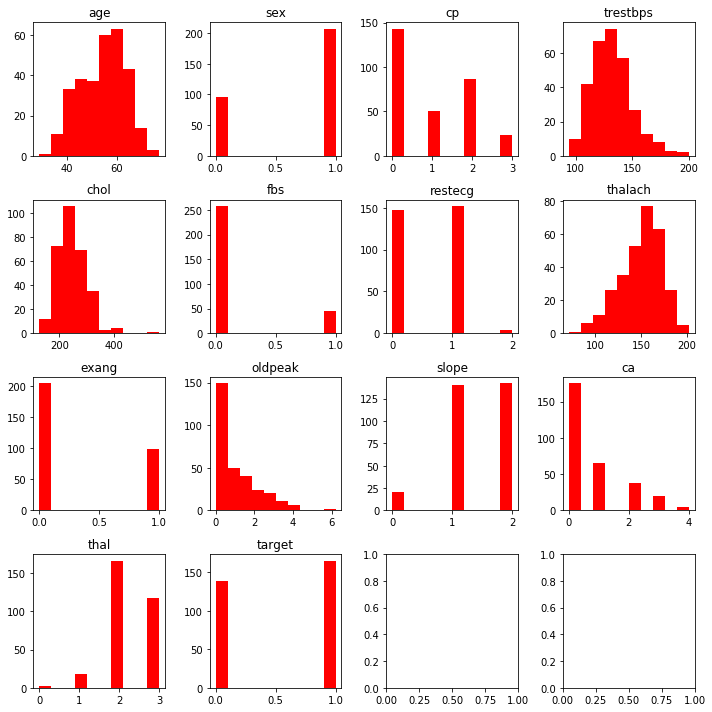

In [5]:
X=np.array(df[df.columns[0:14]])
f,a = plt.subplots(4,4)
f.set_figheight(10)
f.set_figwidth(10)
a = a.ravel()
for idx,ax in enumerate(a):
    if idx<14:
        ax.hist(list(X[:,idx]),color='r')
        ax.set_title(df.columns[idx])
plt.tight_layout()

Now, let's train our random forest. Not all available data will be used for training, some will be used for testing (20%): 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

Now, let's predict the class (likely to have an attak (0) or not (1)) for our testing data of patients, using our trained random forest:

In [43]:
y_predict = model.predict(X_test)

These are the predicted labels by the random forest:

In [44]:
y_predict 

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

...and these are the actual labels of the testing data:

In [45]:
y_test=np.array(list(y_test))
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

Let's see the difference between the predicted and the actual labels. See that, out of 61 predictions, the random forest mistook 12:

In [46]:
sum(abs(y_predict - y_test ))

12

Now, for boosting, let's train five random forests: 

In [47]:
#here your code

RandomForestClassifier(max_depth=5)

let's see the predictions for each random forest:

In [48]:
#here your code

Now, our final prediction will be an average of the predictions of the five random forests. If more than two random forests say that the label must be 1, then, accordingly, the final prediction will be 1 and 0 otherwise:

In [49]:
#here your code

See that our final (averaged) predictions have only 3 mistakes, this is, the boosting does improve indeed the predictions of our initial single model (12 mistakes):

In [50]:
sum(abs(y_predict - np.array(final)))

3